In [1]:
from google.colab import files
uploaded = files.upload()

Saving 04-LinearReg_Salary.csv to 04-LinearReg_Salary.csv


In [19]:
x=np.array([1,2,3,4,5])
y=np.array([2,4,6,8,10])

w=0.0

In [20]:
y_hat=w*x

loss = ((y_hat-y)**2).mean()
print(loss)

44.0


In [21]:
dldw=(2*(w*x-y)*x).mean()
dldw

np.float64(-44.0)

In [22]:
w=w-0.01*dldw
w

np.float64(0.44)

In [23]:
y_hat=w*x

loss = ((y_hat-y)**2).mean()
print(loss)

26.769600000000004


In [24]:
def forward(w,x):
    return w*x
def lossfunc(y_pred, y):
    return ((y_pred-y)**2).mean()
def gradient(w, y, x):
    gr=(2*(w*x-y)*x).mean()
    return gr

x=np.array([1,2,3,4,5])
y=np.array([2,4,6,8,10])

w=0.0
n_epoch=10
lr=0.01
ws=np.array([w])

for epoch in range(n_epoch):
    y_hat=forward(w,x)

    loss=lossfunc(y_hat,y)

    gr=gradient(w,y,x)

    w-=gr*lr

    print(f' epoch {epoch+1}: w= {w:.3f}, loss = {loss:.3f}')
    ws=np.append(ws,w)


 epoch 1: w= 0.440, loss = 44.000
 epoch 2: w= 0.783, loss = 26.770
 epoch 3: w= 1.051, loss = 16.287
 epoch 4: w= 1.260, loss = 9.909
 epoch 5: w= 1.423, loss = 6.029
 epoch 6: w= 1.550, loss = 3.668
 epoch 7: w= 1.649, loss = 2.231
 epoch 8: w= 1.726, loss = 1.358
 epoch 9: w= 1.786, loss = 0.826
 epoch 10: w= 1.833, loss = 0.503


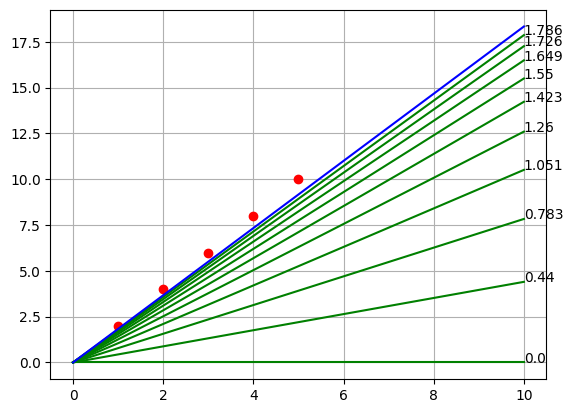

In [25]:
fig=plt.figure()
xv=np.linspace(0,10, 1000)
plt.grid()

plt.plot(x,y,'ro')
for i in range(len(ws)-1):
    plt.plot(xv, ws[i]*xv, 'g')
    plt.annotate(np.round(ws[i],3), xy=(10,ws[i]*10))
plt.plot(xv, ws[-1]*xv, 'b')
plt.show()

In [26]:
def forward(w,b,x):
    return w*x+b
def lossfunc(y_pred, y):
    return ((y_pred-y)**2).mean()
def gradient(w, b, y, x):
    gr_w=(2*(w*x+b-y)*x).mean()
    gr_b=(2*(w*x+b-y)).mean()
    return gr_w, gr_b

x=np.array([1,2,3,4,5])
y=np.array([2,4,6,8,10])

w=0.0
b=0.0
n_epoch=10
lr=0.01
param=np.array([w,b])

for epoch in range(n_epoch):
    y_hat=forward(w,b,x)

    loss=lossfunc(y_hat,y)

    gr_w, gr_b=gradient(w, b, y,x)

    w-=gr_w*lr
    b-=gr_b*lr

    print(f' epoch {epoch+1}: w= {w:.3f}, b= {b:.3f}, loss = {loss:.3f}')
    param=np.vstack((param,[w,b]))

 epoch 1: w= 0.440, b= 0.120, loss = 44.000
 epoch 2: w= 0.776, b= 0.211, loss = 25.661
 epoch 3: w= 1.033, b= 0.280, loss = 14.973
 epoch 4: w= 1.229, b= 0.333, loss = 8.745
 epoch 5: w= 1.378, b= 0.372, loss = 5.116
 epoch 6: w= 1.493, b= 0.402, loss = 3.000
 epoch 7: w= 1.580, b= 0.425, loss = 1.768
 epoch 8: w= 1.647, b= 0.441, loss = 1.049
 epoch 9: w= 1.698, b= 0.454, loss = 0.630
 epoch 10: w= 1.737, b= 0.463, loss = 0.386


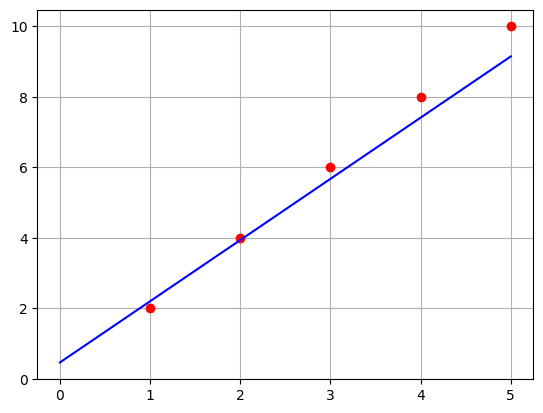

In [27]:
fig=plt.figure()
xv=np.linspace(0,5, 1000)
plt.grid()

plt.plot(x,y,'ro')
plt.plot(xv, param[-1][0]*xv+param[-1][1], 'b')
plt.show()

In [28]:
def forward(w,b,x):
    return w*x+b
def lossfunc(y_pred, y):
    return ((y_pred-y)**2).mean()
def gradient(w, b, y, x):
    gr_w=(2*(w*x+b-y)*x).mean()
    gr_b=(2*(w*x+b-y)).mean()
    return gr_w, gr_b

def shuffle_data(X, y):
    N = X.shape[0]
    shuffled_idx = np.random.permutation(N)
    return X[shuffled_idx], y[shuffled_idx]

x=np.array([1,2,3,4,5])
y=np.array([2,4,6,8,10])
x, y = shuffle_data(x, y)
N=x.shape[0]
batch_size=3
n_batches=N//batch_size

w=0.0
b=0.0
n_epoch=10
lr=0.01
param=np.array([w,b])

for epoch in range(n_epoch):
    running_loss = 0.0
    bn=1
    for b_idx in range(0, N, batch_size):
        x_batch=x[b_idx:b_idx+batch_size]
        y_batch=y[b_idx:b_idx+batch_size]
        y_hat=forward(w,b,x_batch)

        loss=lossfunc(y_hat,y_batch)
        running_loss+=(loss*x_batch.shape[0])
        gr_w, gr_b=gradient(w, b, y_batch,x_batch)

        w-=gr_w*lr
        b-=gr_b*lr

        print(f' epoch {epoch+1}, batch {bn}: loss = {loss:.3f} ')
        bn+=1
    avg_loss = running_loss/ N
    print(f' epoch {epoch+1}: w= {w:.3f}, b= {b:.3f}, loss = {avg_loss:.3f}')
    param=np.vstack((param,[w,b]))

 epoch 1, batch 1: loss = 60.000 
 epoch 1, batch 2: loss = 9.000 
 epoch 1: w= 0.734, b= 0.200, loss = 39.600
 epoch 2, batch 1: loss = 22.222 
 epoch 2, batch 2: loss = 3.100 
 epoch 2: w= 1.178, b= 0.319, loss = 14.573
 epoch 3, batch 1: loss = 8.320 
 epoch 3, batch 2: loss = 1.040 
 epoch 3: w= 1.446, b= 0.389, loss = 5.408
 epoch 4, batch 1: loss = 3.173 
 epoch 4, batch 2: loss = 0.342 
 epoch 4: w= 1.608, b= 0.430, loss = 2.041
 epoch 5, batch 1: loss = 1.249 
 epoch 5, batch 2: loss = 0.119 
 epoch 5: w= 1.707, b= 0.454, loss = 0.797
 epoch 6, batch 1: loss = 0.519 
 epoch 6, batch 2: loss = 0.057 
 epoch 6: w= 1.767, b= 0.466, loss = 0.334
 epoch 7, batch 1: loss = 0.236 
 epoch 7, batch 2: loss = 0.045 
 epoch 7: w= 1.803, b= 0.472, loss = 0.160
 epoch 8, batch 1: loss = 0.122 
 epoch 8, batch 2: loss = 0.047 
 epoch 8: w= 1.826, b= 0.475, loss = 0.092
 epoch 9, batch 1: loss = 0.074 
 epoch 9, batch 2: loss = 0.052 
 epoch 9: w= 1.840, b= 0.475, loss = 0.065
 epoch 10, batc

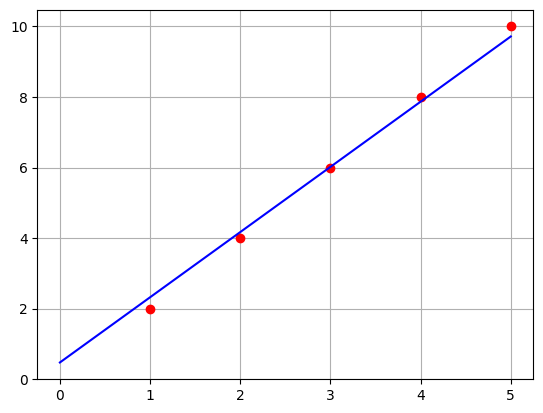

In [29]:
fig=plt.figure()
xv=np.linspace(0,5, 1000)
plt.grid()

plt.plot(x,y,'ro')
plt.plot(xv, param[-1][0]*xv+param[-1][1], 'b')
plt.show()